<div style="text-align: center;">
    <img src="../images/iofbanner.png" alt="Banner curso" style="width:80%">
</div>

# Tema 2
### Sound of Speed

In [15]:
import os
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [16]:
# Variables
T = 20
S = 35
Z = 0

In [17]:
# Cálculos
A = 4.591 * T
B = -0.05304 * T**2
C = 0.0002374 * T**3
D = 1.340 * (S - 35)
E = -0.01025 * T * (S - 35)
F = 0.0613 * Z
G = 1.675e-7 * Z**2
H = -7.139e-13 * T * Z**3

# Sonido
Sonido = 1448.96 + A + B + C + D + E + F + G + H
print(Sonido)


1521.4632000000001


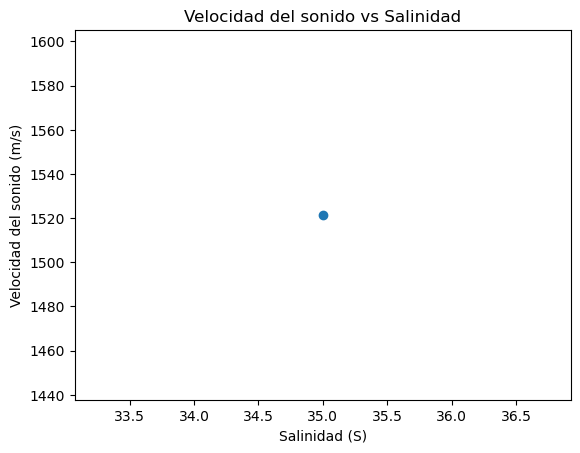

In [18]:
# Gráficas
plt.figure()
plt.plot(S, Sonido, 'o')
plt.xlabel('Salinidad (S)')
plt.ylabel('Velocidad del sonido (m/s)')
plt.title('Velocidad del sonido vs Salinidad')
plt.show()



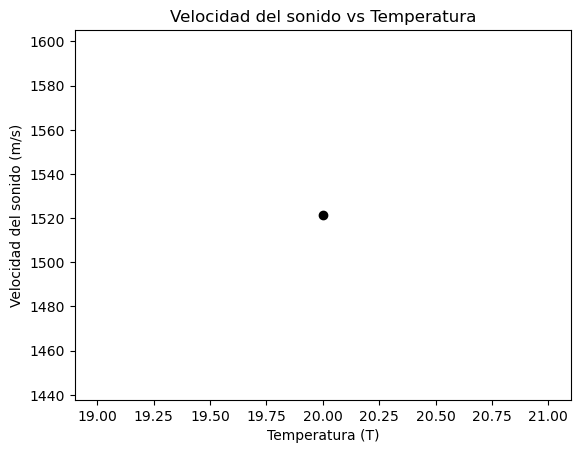

In [19]:
plt.figure()
plt.plot(T, Sonido, 'ko')
plt.xlabel('Temperatura (T)')
plt.ylabel('Velocidad del sonido (m/s)')
plt.title('Velocidad del sonido vs Temperatura')

plt.show()

## Elipsoidal

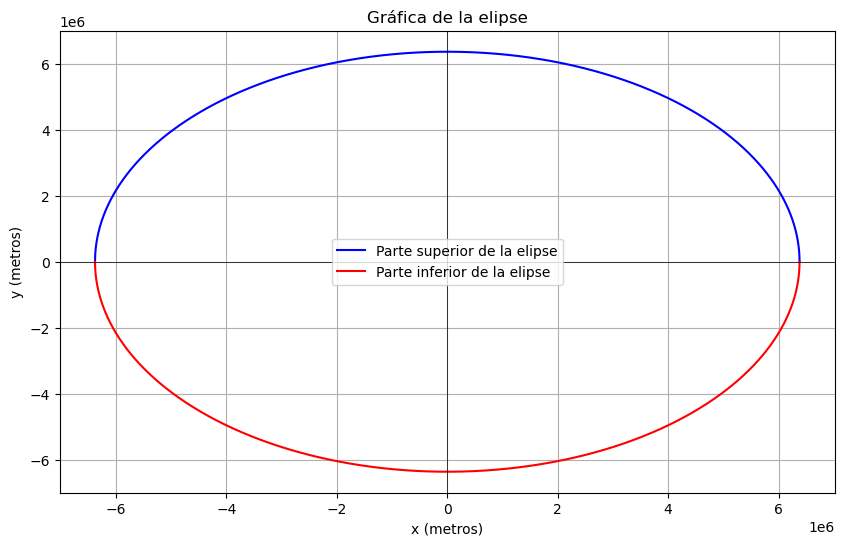

In [20]:
# Constantes
a = 6378137
b = 6356752.31

# Rango de valores para x
x = np.linspace(-a, a, 6000)  # De -6378137 a 6378137 con 1000 puntos equidistantes
# x = np.arange(-6378137, 6378138, 1)  # De -6378137 a 6378137 con paso de 1

# Cálculo de y
y = np.sqrt((1 - (x**2 / a**2)) * b**2)

# Gráficas
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Parte superior de la elipse', color='blue')
plt.plot(x, -y, label='Parte inferior de la elipse', color='red')

# Detalles de la gráfica
plt.xlabel('x (metros)')
plt.ylabel('y (metros)')
plt.title('Gráfica de la elipse')
plt.legend(loc='best')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Mostrar la gráfica
plt.show()

In [21]:
# Identificar el nombre del archivo netCDF
resources_path = "../resources/"
catalogo = [f for f in os.listdir("../resources/") if f.endswith('.nc')]
if not catalogo:
    raise FileNotFoundError("No se encontraron archivos .nc en la carpeta 'resources'.")
name = os.path.join(resources_path, catalogo[0])
# name = catalogo[0]1
name

'../resources/gebco_2023_n23.5437_s17.699_w-160.8618_e-153.8525.nc'

In [22]:
# Obtener información del archivo netCDF
dataset = nc.Dataset(name)
Lat = dataset.variables['lat'][:]
Lon = dataset.variables['lon'][:]
Z2 = dataset.variables['elevation'][:]
Z = Z2.astype(float)



In [23]:
print(f'Lat size: {Lat.size}')
print(f'Lon size: {Lon.size}')
print(f'Z size: {Z.size}')

print(f'Lat shape: {Lat.shape}')
print(f'Lon shape: {Lon.shape}')
print(f'Z shape: {Z.shape}')


Lat size: 1402
Lon size: 1682
Z size: 2358164
Lat shape: (1402,)
Lon shape: (1682,)
Z shape: (1402, 1682)


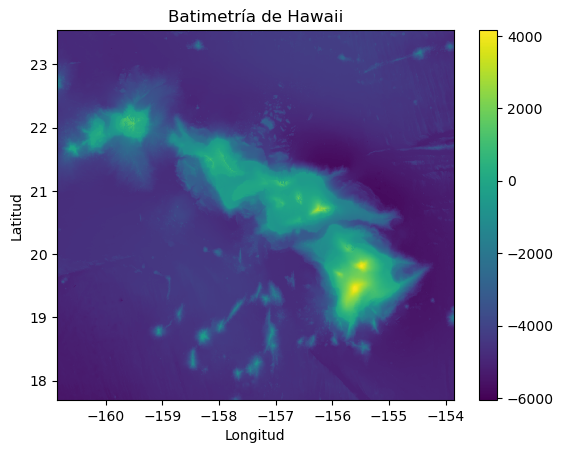

In [24]:
# Gráfica de pcolor
plt.figure()
plt.pcolor(Lon, Lat, Z, shading='nearest')
plt.colorbar()
plt.clim = (-6000, 4000)
plt.title('Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


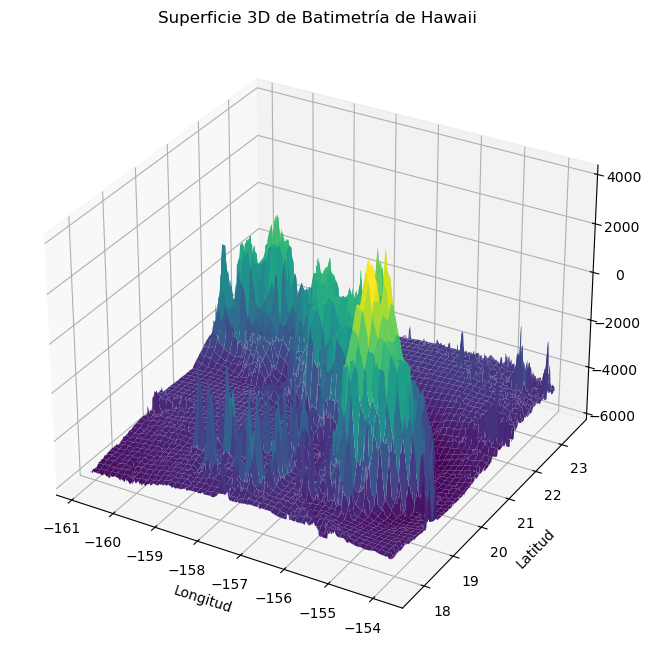

In [25]:
# Gráfica de mesh
X, Y = np.meshgrid(Lon, Lat)
# plt.figure()
# plt.figure(figsize=(12, 8))
ax = plt.figure(figsize=(12, 8)).add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('Superficie 3D de Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

<Figure size 640x480 with 0 Axes>

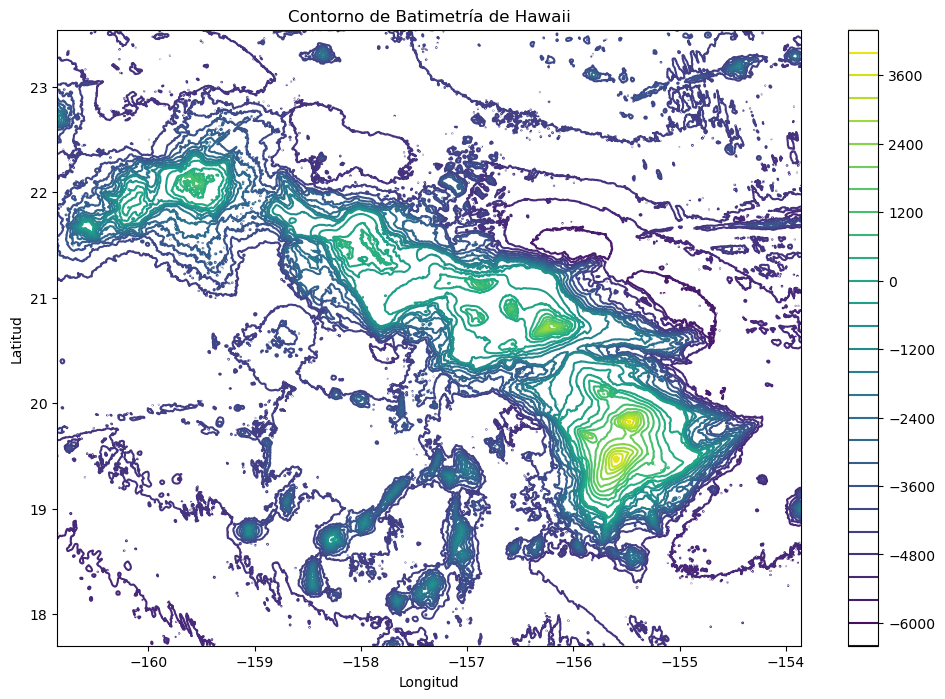

In [26]:
# Gráfica de contorno
plt.figure()
plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, 30)
plt.colorbar(contour)
plt.title('Contorno de Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

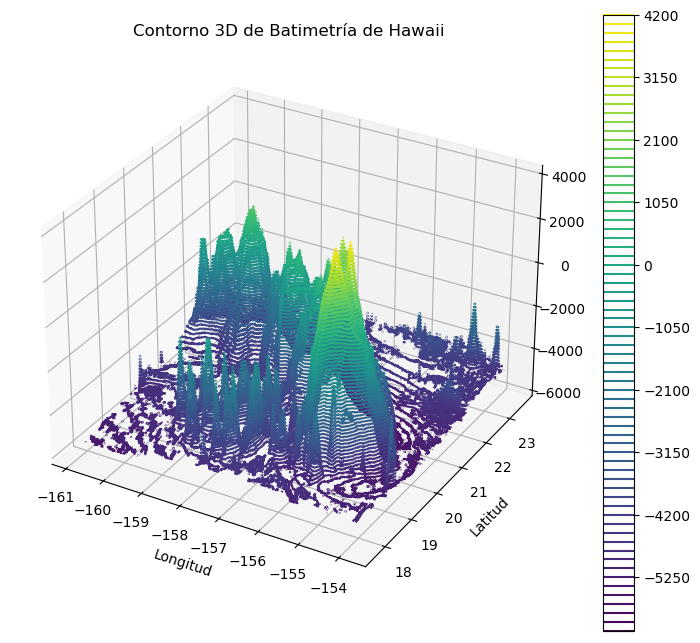

In [27]:
# Gráfica de contorno 3D
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection='3d')
contour3 = ax.contour3D(X, Y, Z, 100)
plt.colorbar(contour3)
plt.title('Contorno 3D de Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

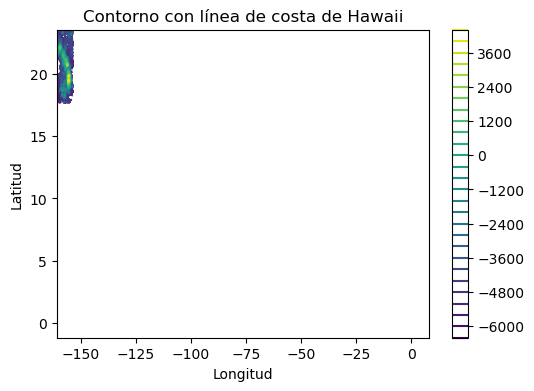

In [28]:
# Digitalizar línea de costa de GEarth y convertirla en GPS, visualizar
Costa = np.zeros((100, 10))

# Agregar línea de costa a la gráfica de contorno
plt.figure(figsize=(6, 4))
contour = plt.contour(X, Y, Z, 30)
plt.colorbar(contour)
plt.plot(Costa[:, 2], Costa[:, 1], 'k')
plt.title('Contorno con línea de costa de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()